# Проект: классификация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn.preprocessing  import LabelBinarizer
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [2]:
df = pd.read_csv('data/bank_fin.csv', sep = ';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


### Задание 2

In [4]:
df['job'].sort_values()

0        admin.
2154     admin.
8198     admin.
2155     admin.
8202     admin.
         ...   
5805    unknown
5834    unknown
6338    unknown
4515    unknown
6985    unknown
Name: job, Length: 11162, dtype: object

### Задание 3

In [5]:
df['balance'] = df['balance'].str.replace(',', '.')
df['balance'] = df['balance'].str.replace('$', '')
df['balance'] = df['balance'].str.replace(' ', '')
df['balance'] = df['balance'].astype (float)
print(round(df["balance"].mean(), 3))

1529.129


### Задание 4

In [6]:
df['balance'] = df['balance']. fillna (df['balance'].median())
print(round(df["balance"].mean(), 3))

1526.936


### Задание 5

In [7]:
print(df['job'].mode())
print(df['education'].mode())
df['job'] = df['job'].str.replace('unknown', 'management')
df['education'] = df['education'].str.replace('unknown', 'secondary')

0    management
Name: job, dtype: object
0    secondary
Name: education, dtype: object


In [8]:
df_balance = df[(df['job'] == 'management') & (df['education'] == 'secondary')]
print(round(df_balance["balance"].mean(), 3))

1598.883


### Задание 6

In [9]:

x = df['balance']
quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)
outliers = df['balance'][(x < lower_bound) | (x > upper_bound)]
cleaned = df['balance'][(x >= lower_bound) & (x <= upper_bound)]
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
print(f'Нижняя граница:: {lower_bound}')
print(f'Верхняя граница:: {upper_bound}')

Число выбросов по методу Тьюки: 1057
Результирующее число записей: 10105
Нижняя граница:: -2241.0
Верхняя граница:: 4063.0


In [10]:
cleaned_df = df[(x>=lower_bound) & (x <= upper_bound)]
cleaned_df.shape

(10105, 17)

## Часть 2:  Разведывательный анализ

### Задание 1

In [11]:
cleaned_df['deposit'].value_counts()

deposit
no     5424
yes    4681
Name: count, dtype: int64

<AxesSubplot: xlabel='deposit', ylabel='count'>

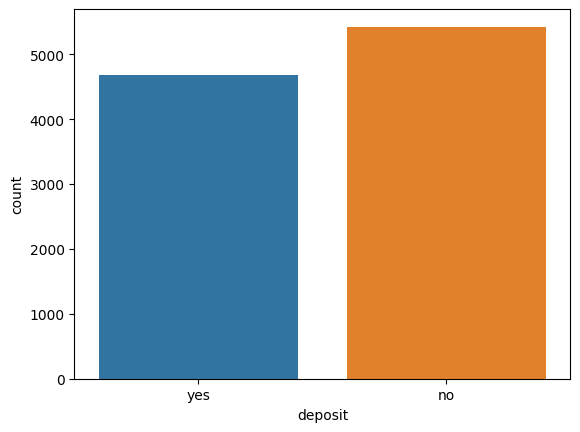

In [12]:
sns.countplot(data=cleaned_df, x='deposit')

### Задания 2 и 3

In [13]:
cleaned_df['age'].max()

95

In [14]:
cleaned_df['duration'].min()

2

### Задания 4 и 5

In [16]:
types = cleaned_df.dtypes
cat_features = list(types[(types == 'object')].index)
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [17]:
len(cleaned_df['job'].value_counts())

11

### Задание 6

In [19]:
cleaned_df['poutcome'].value_counts()

poutcome
unknown    7570
failure    1109
success     945
other       481
Name: count, dtype: int64

### Задание 7

In [21]:
cleaned_df['month'].value_counts()

month
may    2617
jul    1418
aug    1385
jun    1104
apr     830
nov     780
feb     709
oct     335
jan     319
sep     278
mar     237
dec      93
Name: count, dtype: int64

In [23]:
cleaned_df['deposit']

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 10105, dtype: object

In [24]:
alance = cleaned_df[['deposit', 'month']]
alance.value_counts()

deposit  month
no       may      1776
yes      may       841
no       jul       836
         aug       775
yes      aug       610
no       jun       606
yes      jul       582
         apr       513
         jun       498
no       nov       456
yes      feb       386
         nov       324
no       feb       323
         apr       317
yes      oct       273
         sep       232
         mar       213
no       jan       194
yes      jan       125
         dec        84
no       oct        62
         sep        46
         mar        24
         dec         9
Name: count, dtype: int64

In [25]:
cleaned_df['age']

0        59
1        56
2        41
3        55
4        54
         ..
11157    33
11158    39
11159    32
11160    43
11161    34
Name: age, Length: 10105, dtype: int64

### Задание 8

In [27]:
cleaned_df['age'].max()

95

In [28]:
cut_labels_4 = ['<30', '30-40', '40-50', '50-60', '60+']
cut_bins = [0, 30, 40, 50, 60, 9999]

cleaned_df['deposit_age'] = pd.cut(cleaned_df['age'],
                       bins=cut_bins,
                       labels=cut_labels_4)
cleaned_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,deposit_age
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,50-60
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,50-60
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,40-50
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,50-60
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes,50-60


### Задания 9 и 10

In [31]:
cleaned_df['marital'].value_counts()

marital
married     5715
single      3213
divorced    1177
Name: count, dtype: int64

In [32]:
cleaned_df['job'].value_counts()

job
management       2315
blue-collar      1807
technician       1638
admin.           1246
services          868
retired           663
self-employed     358
unemployed        332
student           326
entrepreneur      300
housemaid         252
Name: count, dtype: int64

In [33]:
cleaned_df['marital'].value_counts()

marital
married     5715
single      3213
divorced    1177
Name: count, dtype: int64

### Задание 11

## Часть 3: преобразование данных

### Задание 1

In [38]:
le = LabelEncoder()# Создание экземпляра класса LabelEncoder()
cleaned_df['education'] = le.fit_transform(cleaned_df['education'])# Кодирование признака
cleaned_df['deposit_age'] = le.fit_transform(cleaned_df['deposit_age'])
cleaned_df['education'].sum()

11995

### Задания 2 и 3

In [40]:
lb = LabelBinarizer() # Создание экземпляра класса LabelEncoder()
cleaned_df['deposit'] = lb.fit_transform(cleaned_df['deposit'])# Кодирование признака
cleaned_df['default'] = lb.fit_transform(cleaned_df['default'])
cleaned_df['housing'] = lb.fit_transform(cleaned_df['housing'])
cleaned_df['loan'] = lb.fit_transform(cleaned_df['loan'])
print(round(cleaned_df['deposit'].std(), 3))
print(round(cleaned_df['default'].mean(), 3))
print(round(cleaned_df['housing'].mean(), 3))
print(round(cleaned_df['loan'].mean(), 3))

0.499
0.016
0.481
0.138


### Задание 4

In [42]:
cleaned_df = pd.get_dummies(cleaned_df, columns=['job', 'marital','contact' ,'month' ,'poutcome'])
cleaned_df

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,1,0,2343.0,1,0,5,1042,1,-1,...,False,False,True,False,False,False,False,False,False,True
1,56,1,0,45.0,0,0,5,1467,1,-1,...,False,False,True,False,False,False,False,False,False,True
2,41,1,0,1270.0,1,0,5,1389,1,-1,...,False,False,True,False,False,False,False,False,False,True
3,55,1,0,2476.0,1,0,5,579,1,-1,...,False,False,True,False,False,False,False,False,False,True
4,54,2,0,184.0,0,0,5,673,2,-1,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,0,1.0,1,0,20,257,1,-1,...,False,False,False,False,False,False,False,False,False,True
11158,39,1,0,733.0,0,0,16,83,4,-1,...,True,False,False,False,False,False,False,False,False,True
11159,32,1,0,29.0,0,0,19,156,2,-1,...,False,False,False,False,False,False,False,False,False,True
11160,43,1,0,0.0,0,1,8,9,2,172,...,False,False,True,False,False,False,True,False,False,False


In [43]:
cleaned_df.shape

(10105, 46)

### Задания 5 и 6

<AxesSubplot: >

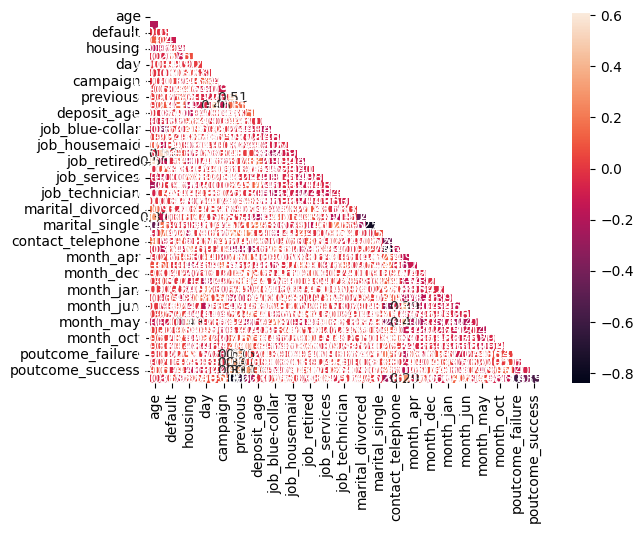

In [45]:
matrix = np.triu(cleaned_df.corr())
sns.heatmap(cleaned_df.corr(), annot=True, mask=matrix)

<AxesSubplot: >

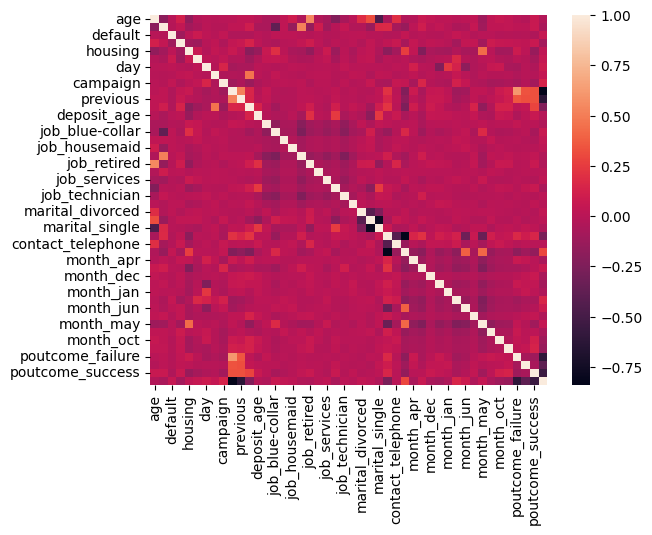

In [46]:
sns.heatmap(cleaned_df.corr())

### Задания 7 и 8

In [48]:
X = cleaned_df.drop(['deposit'], axis=1)
y = cleaned_df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [49]:
X_test.shape

(3335, 45)

In [50]:
y_test.mean()

0.46326836581709147

### Задание 9

In [52]:
selector = SelectKBest(f_classif, k=15)
selector.fit(X_train, y_train)
selector.get_feature_names_out()

array(['balance', 'housing', 'duration', 'campaign', 'pdays', 'previous',
       'deposit_age', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

### Задание 10

In [54]:
cleaned = cleaned_df[['deposit','balance', 'housing', 'duration', 'campaign', 'pdays', 'previous',
       'deposit_age', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown']]

In [55]:
X = cleaned.drop(['deposit'], axis=1)
y = cleaned['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [56]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)                           # fit() только на train данных
X_train_scaled = scaler.transform(X_train)    # fransform() на train данных
X_test_scaled = scaler.transform(X_test)      # fransform() на test данных

print(X_test_scaled[:, 0].mean())  # для признака balance, обратите внимание именно на столбец

0.46823674223097866


# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [58]:
log_reg = linear_model.LogisticRegression(
    solver='sag', 
    random_state=42, 
    max_iter=1000 )

log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='sag')

In [67]:
#Делаем предсказание для тренировочной выборки
y_train_pred = log_reg.predict(X_train_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred))
#Делаем предсказание для тестовой выборки
y_test_pred = log_reg.predict(X_test_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      3634
           1       0.84      0.76      0.80      3136

    accuracy                           0.82      6770
   macro avg       0.83      0.82      0.82      6770
weighted avg       0.83      0.82      0.82      6770

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1790
           1       0.83      0.74      0.78      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.80      0.81      3335
weighted avg       0.81      0.81      0.81      3335



### Задания 2,3,4

In [69]:
dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42,
    max_depth = 6
)

dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

In [70]:
#Делаем предсказание для тренировочной выборки
y_train_pred2 = dt.predict(X_train_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred2))
#Делаем предсказание для тестовой выборки
y_test_pred2 = dt.predict(X_test_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred2))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      3634
           1       0.77      0.86      0.81      3136

    accuracy                           0.82      6770
   macro avg       0.82      0.82      0.82      6770
weighted avg       0.82      0.82      0.82      6770

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1790
           1       0.76      0.84      0.80      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.81      0.81      3335
weighted avg       0.81      0.81      0.81      3335



### Задание 5

In [73]:
from sklearn.model_selection import GridSearchCV

parameters =  {'min_samples_split': [2, 5, 7, 10], 'max_depth':[3,5,7]}

model_cv = GridSearchCV(tree.DecisionTreeClassifier(), 
                        parameters,
                        cv=3, scoring=('f1'), 
                        return_train_score=True)

model_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 7, 10]},
             return_train_score=True, scoring='f1')

In [75]:
%time model_cv.fit(X_train_scaled, y_train) 
print("accuracy на тестовом наборе: {:.2f}".format(model_cv.score(X_test_scaled, y_test)))
y_test_pred = model_cv.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(model_cv.best_params_))

CPU times: total: 891 ms
Wall time: 1.35 s
accuracy на тестовом наборе: 0.80
f1_score на тестовом наборе: 0.80
Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_split': 5}


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [77]:
rf = ensemble.RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10,
    random_state=42
)
#Обучаем модель
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [78]:
#Делаем предсказание для тренировочной выборки
y_train_pred3 = rf.predict(X_train_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred3))
#Делаем предсказание для тестовой выборки
y_test_pred3 = rf.predict(X_test_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred3))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3634
           1       0.84      0.86      0.85      3136

    accuracy                           0.86      6770
   macro avg       0.86      0.86      0.86      6770
weighted avg       0.86      0.86      0.86      6770

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



### Задания 2 и 3

In [80]:
gb = ensemble.GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    min_samples_leaf=5,
    max_depth=5,
    random_state=42
)
gb.fit(X_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, min_samples_leaf=5,
                           n_estimators=300, random_state=42)

In [81]:
#Делаем предсказание для тренировочной выборки
y_train_pred4 = gb.predict(X_train_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred4))
#Делаем предсказание для тестовой выборки
y_test_pred4 = gb.predict(X_test_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred4))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3634
           1       0.87      0.89      0.88      3136

    accuracy                           0.89      6770
   macro avg       0.89      0.89      0.89      6770
weighted avg       0.89      0.89      0.89      6770

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



### Задание 4

In [83]:
estimators = [
    ('dt', tree.DecisionTreeClassifier(
        criterion='entropy',
        min_samples_leaf=5,
        max_depth=6,
        random_state=42
        )
    ),
    ('log_reg', linear_model.LogisticRegression(
        solver='sag',
        random_state=42 
        )
    ),
    ('gb', ensemble.GradientBoostingClassifier(
        learning_rate=0.05,
        n_estimators=300,
        min_samples_leaf=5,
        max_depth=5,
        random_state=42
        )
    )
]

stack = ensemble.StackingClassifier(
    estimators,
    final_estimator=linear_model.LogisticRegression(random_state=42)
)
stack.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=6,
                                                       min_samples_leaf=5,
                                                       random_state=42)),
                               ('log_reg',
                                LogisticRegression(random_state=42,
                                                   solver='sag')),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           max_depth=5,
                                                           min_samples_leaf=5,
                                                           n_estimators=300,
                                                           random_state=42))],
                   final_estimator=LogisticRegression(random_state=42))

In [84]:
#Делаем предсказание для тренировочной выборки
y_train_pred5 = stack.predict(X_train_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_train, y_train_pred5))
#Делаем предсказание для тестовой выборки
y_test_pred5 = stack.predict(X_test_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred5))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3634
           1       0.86      0.86      0.86      3136

    accuracy                           0.87      6770
   macro avg       0.87      0.87      0.87      6770
weighted avg       0.87      0.87      0.87      6770

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1790
           1       0.81      0.81      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



### Задание 5

In [85]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга

### Задания 6,7,8

In [87]:
import optuna

print("Версия Optuna: {}".format(optuna.__version__))

Версия Optuna: 3.1.1


In [86]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna

In [93]:
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model_optuna = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  # обучаем модель
  model_optuna.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model_optuna.predict(X_train_scaled))

  return score

In [94]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2023-05-17 02:58:14,777] A new study created in memory with name: RandomForestClassifier
[I 2023-05-17 02:58:19,921] Trial 0 finished with value: 0.854013456423095 and parameters: {'n_estimators': 186, 'max_depth': 19, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.854013456423095.
[I 2023-05-17 02:58:22,887] Trial 1 finished with value: 0.8539746993596752 and parameters: {'n_estimators': 161, 'max_depth': 18, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.854013456423095.
[I 2023-05-17 02:58:25,883] Trial 2 finished with value: 0.8667917448405253 and parameters: {'n_estimators': 128, 'max_depth': 28, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.8667917448405253.
[I 2023-05-17 02:58:28,776] Trial 3 finished with value: 0.8608110223892281 and parameters: {'n_estimators': 153, 'max_depth': 12, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.8667917448405253.
[I 2023-05-17 02:58:31,769] Trial 4 finished with value: 0.8498122653316647 and parameters: {'n_est

CPU times: total: 50.3 s
Wall time: 1min 16s


In [95]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 177, 'max_depth': 24, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.92


In [100]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params )
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test_scaled, y_test)))
y_test_pred = model.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовом наборе: 0.83
f1_score на тестовом наборе: 0.82
